In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

In [2]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [3]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [4]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [5]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


## Line Plots ##

In [6]:
no_999 = simple.where('AGE', are.below(999))

In [7]:
everyone = no_999.where('SEX', 0).drop('SEX')

In [8]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


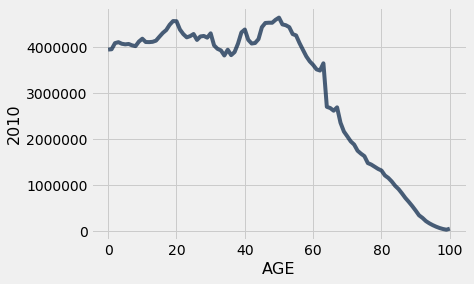

In [9]:
# Arguments are horizontal axis variable, vertical axis variable
everyone.plot('AGE', '2010')

In [10]:
# That plot should be labeled! Here are 3 ways to label it:

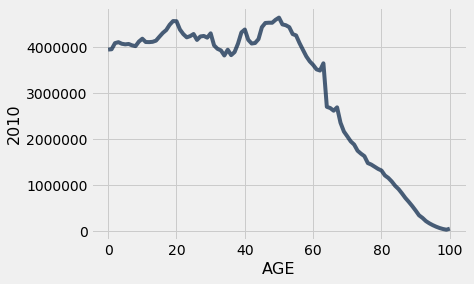

In [11]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2010')

US Population


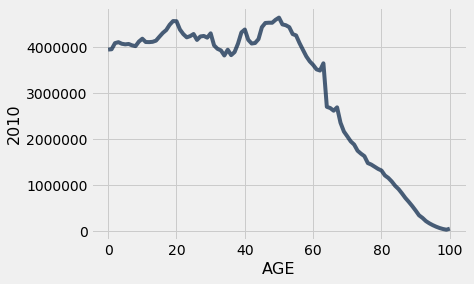

In [12]:
everyone.plot('AGE', '2010')
print('US Population')  # <--- Print out what it is

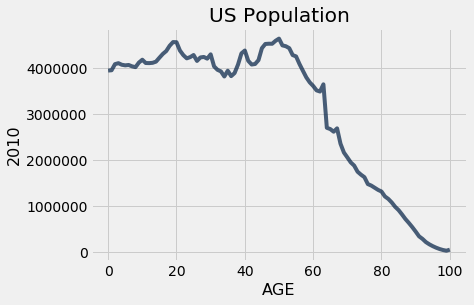

In [18]:
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for our course

In [15]:
# Examine the steep dropoff in population
everyone.where('AGE', are.between(60, 71))

AGE,2010,2014
60,3616733,3985367
61,3520121,3834428
62,3495073,3685822
63,3652174,3572379
64,2706063,3488136
65,2678532,3384449
66,2621346,3347776
67,2693709,3485502
68,2359819,2572527
69,2167833,2535012


In [16]:
2010 - 63

1947

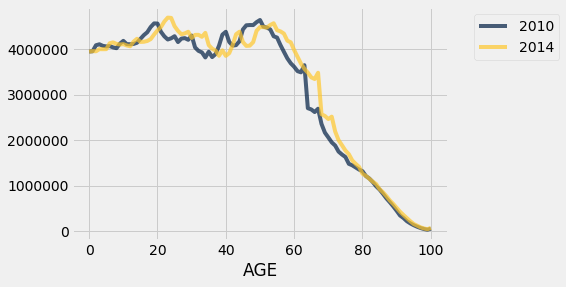

In [17]:
# If given one argument, 'plot' puts that on the x-axis, all other columns plotted on the y-axis
everyone.plot('AGE')

## Males and Females in 2014 ##

In [19]:
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [20]:
pop_2014 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),
    'Females', females.column('2014')
)
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


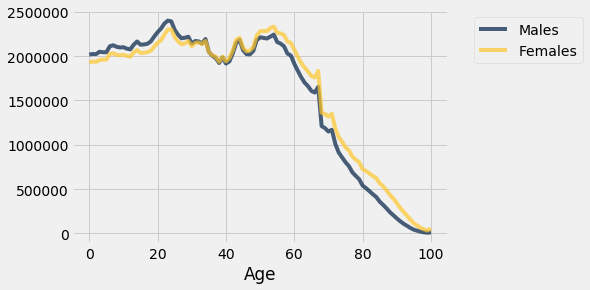

In [21]:
pop_2014.plot('Age')

In [22]:
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

array([48.89366444, 48.93512897, 48.89796583, 48.85091594, 48.95654945,
       48.9752945 , 48.95625723, 48.91092922, 48.89890191, 48.93212091,
       48.9734048 , 48.99969062, 48.99606517, 48.95633512, 48.86619665,
       48.88170995, 48.86445062, 48.88986227, 48.76308397, 48.668799  ,
       48.63932932, 48.5330796 , 48.66269094, 48.92327135, 49.03933504,
       49.08996242, 49.16509171, 49.21162965, 49.28169646, 49.44899983,
       49.65375766, 49.75983547, 49.86565039, 49.93824999, 49.74770193,
       49.99251351, 50.05521355, 50.20280862, 50.18189092, 50.10049432,
       50.31587643, 50.47966604, 50.40624483, 50.42907187, 50.23118137,
       50.32445422, 50.37830234, 50.53327291, 50.51106084, 50.55818402,
       50.75941276, 50.86725098, 50.93664868, 51.06392595, 50.97417608,
       51.18857886, 51.29709649, 51.45934869, 51.62031101, 51.70400468,
       51.97408419, 52.08985538, 52.15439053, 52.36152155, 52.36785492,
       52.49779211, 52.53185996, 52.56760719, 52.90700545, 53.15

In [23]:
pct_female = np.round(pct_female, 3)
pct_female

array([48.894, 48.935, 48.898, 48.851, 48.957, 48.975, 48.956, 48.911,
       48.899, 48.932, 48.973, 49.   , 48.996, 48.956, 48.866, 48.882,
       48.864, 48.89 , 48.763, 48.669, 48.639, 48.533, 48.663, 48.923,
       49.039, 49.09 , 49.165, 49.212, 49.282, 49.449, 49.654, 49.76 ,
       49.866, 49.938, 49.748, 49.993, 50.055, 50.203, 50.182, 50.1  ,
       50.316, 50.48 , 50.406, 50.429, 50.231, 50.324, 50.378, 50.533,
       50.511, 50.558, 50.759, 50.867, 50.937, 51.064, 50.974, 51.189,
       51.297, 51.459, 51.62 , 51.704, 51.974, 52.09 , 52.154, 52.362,
       52.368, 52.498, 52.532, 52.568, 52.907, 53.154, 53.405, 53.592,
       53.929, 54.4  , 54.642, 54.728, 55.249, 55.702, 56.179, 56.816,
       57.278, 57.97 , 58.654, 59.426, 60.31 , 61.159, 62.261, 63.24 ,
       64.423, 65.71 , 66.783, 67.659, 69.009, 69.972, 71.585, 72.745,
       74.225, 75.542, 77.322, 78.395, 80.984])

In [24]:
pop_2014 = pop_2014.with_column('Percent female', pct_female)
pop_2014

Age,Males,Females,Percent female
0,2017857,1930493,48.894
1,2023253,1938870,48.935
2,2022502,1935270,48.898
3,2048618,1956572,48.851
4,2043498,1959950,48.957
5,2043467,1961391,48.975
6,2110328,2024024,48.956
7,2122240,2031760,48.911
8,2105122,2014402,48.899
9,2097272,2009560,48.932


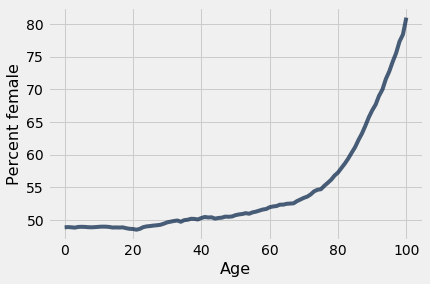

In [25]:
pop_2014.plot('Age', 'Percent female')

## Scatter Plots ##

In [28]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


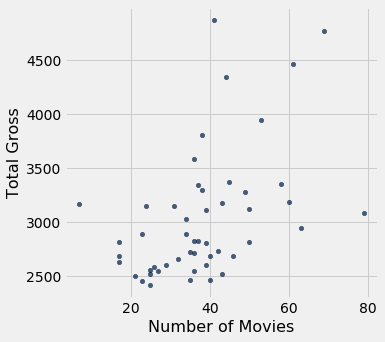

In [29]:
actors.scatter('Number of Movies', 'Total Gross')

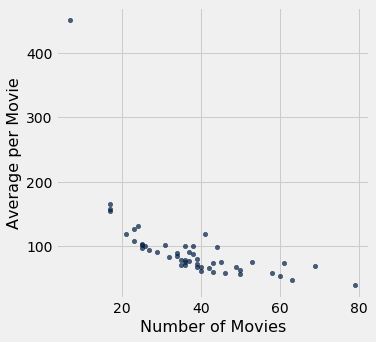

In [30]:
actors.scatter('Number of Movies', 'Average per Movie')

In [31]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [34]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [35]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [36]:
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


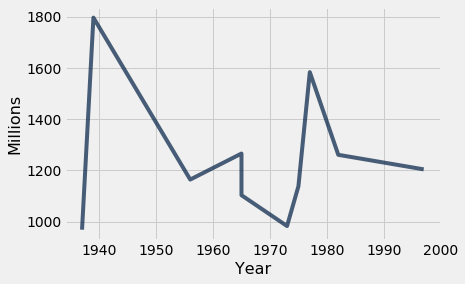

In [37]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

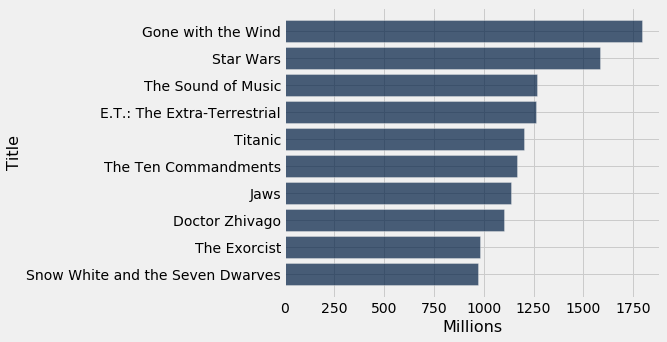

In [38]:
top10_adjusted.barh('Title', 'Millions')

In [ ]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted)

In [43]:
top10 = top_movies.sort('Gross', descending = True).take(np.arange(10))
top10 = top10.with_column('Age', 2020 - top10.column('Year'))
top10

Title,Studio,Gross,Gross (Adjusted),Year,Age
Star Wars: The Force Awakens,Buena Vista,936662225,961143200,2015,5
Avatar,Fox,760507625,865082100,2009,11
Titanic,Paramount,658672302,1204368000,1997,23
Jurassic World,Universal,652270625,702747400,2015,5
Marvel's The Avengers,Buena Vista,623357910,683474000,2012,8
The Dark Knight,Warner Brothers,534858444,661980500,2008,12
Rogue One: A Star Wars Story,Buena Vista,532177324,537326000,2016,4
Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017,3
Finding Dory,Buena Vista,486295561,499245400,2016,4
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999,21


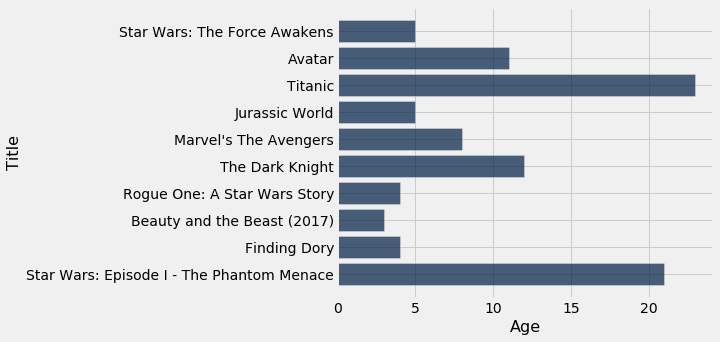

In [44]:
top10.barh('Title', 'Age')